In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [6]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 5 columns):
timestamp    4074 non-null object
id           4074 non-null int64
group        4074 non-null object
action       4074 non-null object
duration     4049 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 159.2+ KB


In [12]:
df.action.value_counts()

view      3260
enroll     814
Name: action, dtype: int64

In [7]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').count()[0] \
/ control_df.query('action == "view"').count()[0]

# Display click through rate
control_ctr

0.23452157598499063

In [8]:
control_df.query('action == "enroll"').count()

timestamp    375
id           375
group        375
action       375
duration     370
dtype: int64

In [13]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').count()[0]\
/experiment_df.query('action == "view"').count()[0]

# Display click through rate
experiment_ctr 

0.26429861529199278

In [14]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.029777039307002151

In [16]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    
    control_ctr = control_df.query('action == "enroll"').count()[0]\
    / control_df.query('action == "view"').count()[0]
    
    experiment_ctr = experiment_df.query('action == "enroll"').count()[0] \
    / experiment_df.query('action == "view"').count()[0]
    
    diffs.append(experiment_ctr - control_ctr)


(array([   28.,   162.,   676.,  1623.,  2548.,  2591.,  1532.,   657.,
          162.,    21.]),
 array([-0.03790509, -0.02435367, -0.01080224,  0.00274919,  0.01630061,
         0.02985204,  0.04340347,  0.05695489,  0.07050632,  0.08405775,
         0.09760917]),
 <a list of 10 Patch objects>)

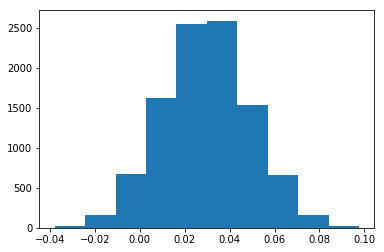

In [27]:
# Convert to numpy array
diffs = np.asarray(diffs)

# Plot sampling distribution
plt.hist(diffs)

(array([   12.,   106.,   551.,  1618.,  2649.,  2730.,  1645.,   583.,
           92.,    14.]),
 array([-0.07444428, -0.05964709, -0.0448499 , -0.03005271, -0.01525553,
        -0.00045834,  0.01433885,  0.02913604,  0.04393322,  0.05873041,
         0.0735276 ]),
 <a list of 10 Patch objects>)

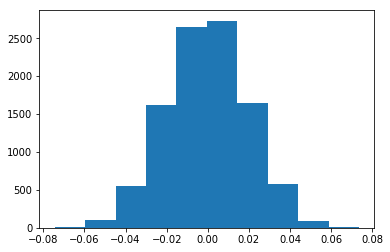

In [30]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals)

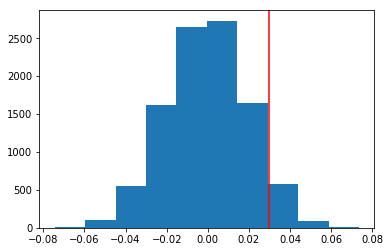

In [34]:
# Plot observed statistic with the null distibution
plt.hist(null_vals)
plt.axvline(x = obs_diff, color = 'red')


In [37]:
(null_vals > obs_diff)

array([ True, False, False, ..., False, False, False], dtype=bool)

In [40]:
np.array([True, False]).mean()

0.5

In [35]:
# Compute p-value
(null_vals > obs_diff).mean()

0.064199999999999993

Conclusion: p_value > 0.05, do not reject the null